# Customer Segmentation

### Import necessary libraries

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

### Read the customer dataset

Dataset has been provided in the repository code folder and please download the dataset and copy the path and paste it in the below code

In [40]:
df_customers = pd.read_csv(r"C:\Users\young\Downloads\customers.csv", index_col=0)
df_customers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


### Let' understand the dataset with describe method

In [41]:
df_customers.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Try to understand the relation between two variables

In [42]:
df_customers.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


### Observe the correlation using a heat map

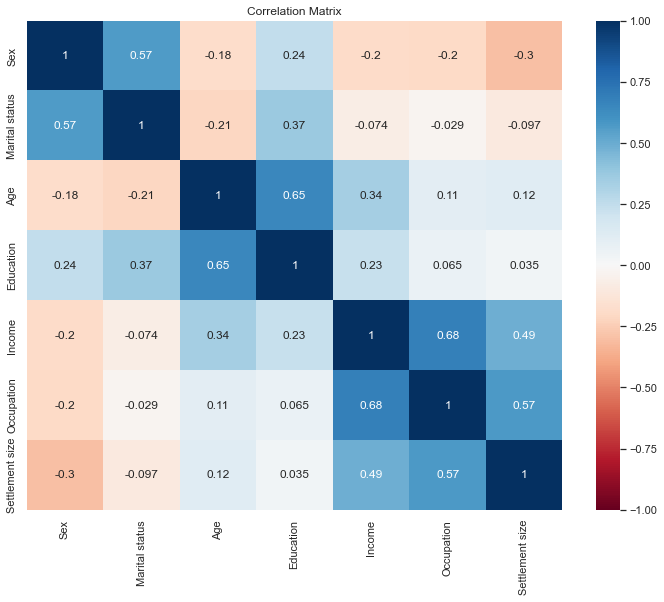

In [43]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_customers.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

### Scatter plot between Age and Income

##### Scatter plot reviles the relationships between variables in details.

Text(0, 0.5, 'Income')

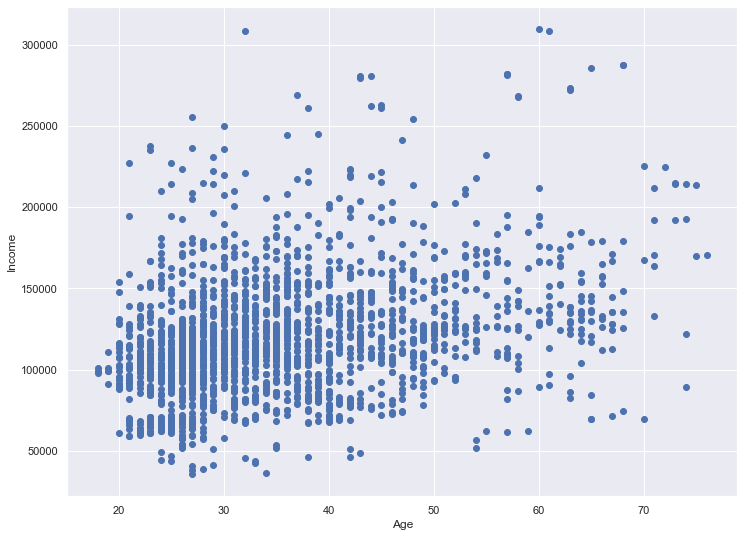

In [44]:
plt.figure(figsize=(12, 9))
# plt.scatter(df_customers.iloc[:, 2], df_customers.iloc[:, 4])
plt.scatter(df_customers['Age'], df_customers['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

### Standardize the dataframe

In [45]:
scaler = StandardScaler()
customers_std = scaler.fit_transform(df_customers)

In [46]:
customers_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

---

### K-means clustering

In [47]:
results = {}

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customers_std)
    results[i] = kmeans.inertia_


C:\Users\young\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


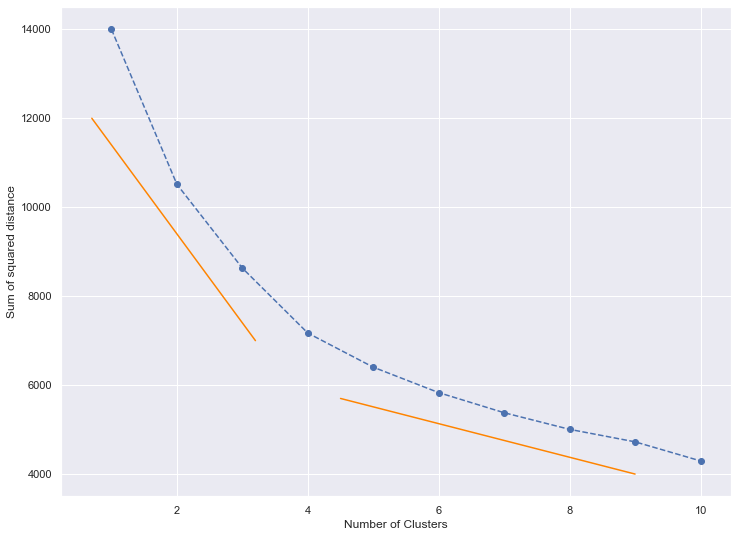

In [48]:
plt.figure(figsize=(12, 9))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.plot([0.7, 3.2], [12000, 7000], color='#FF8400')
plt.plot([4.5, 9], [5700, 4000], color='#FF8400')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### K-means clustering with 4 clusters

In [49]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(customers_std)

KMeans(n_clusters=4, random_state=42)

In [50]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Segment'] = kmeans.labels_  # It will contain the predicted clusters for each observation in our data set
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,2
100001998,0,0,31,0,86400,0,0,1


#### let's try to understand the characteristics of the people in each cluster

In [51]:
df_customers_analysis = df_customers_kmeans.groupby('Segment').mean().round(3)
df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.502,0.692,55.703,2.129,158338.422,1.129,1.110
1,0.353,0.019,35.578,0.747,97859.853,0.329,0.043
2,0.854,0.997,28.963,1.068,105759.119,0.634,0.423
3,0.030,0.174,35.635,0.733,141218.249,1.272,1.523


In [52]:
df_customers_analysis['Count'] = df_customers_kmeans[['Segment', 'Sex']].groupby('Segment').count()
df_customers_analysis['%'] = df_customers_analysis['Count'] / df_customers_analysis['Count'].sum()
df_customers_analysis.rename(index={
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
}, inplace=True)

df_customers_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Count,%
Segment,,,,,,,,,
well-off,0.502,0.692,55.703,2.129,158338.422,1.129,1.110,263,0.1315
fewer-opportunities,0.353,0.019,35.578,0.747,97859.853,0.329,0.043,462,0.2310
standard,0.854,0.997,28.963,1.068,105759.119,0.634,0.423,705,0.3525
career-focused,0.030,0.174,35.635,0.733,141218.249,1.272,1.523,570,0.2850


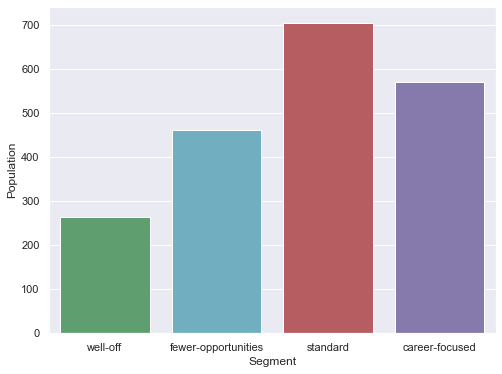

In [53]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_customers_analysis, x=df_customers_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

#### Assign meaningful labels to the segments

In [54]:
df_customers_kmeans['Segment'] = df_customers_kmeans['Segment'].map({
    0: 'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career-focused'
})
df_customers_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,well-off
100000002,1,1,22,1,150773,1,2,standard
100000003,0,0,49,1,89210,0,0,fewer-opportunities
100000004,0,0,45,1,171565,1,1,career-focused
100000005,0,0,53,1,149031,1,1,career-focused
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,fewer-opportunities
100001997,1,1,27,1,117744,1,0,standard
100001998,0,0,31,0,86400,0,0,fewer-opportunities


### Visualize the segmented customers

#### (Age vs Income)

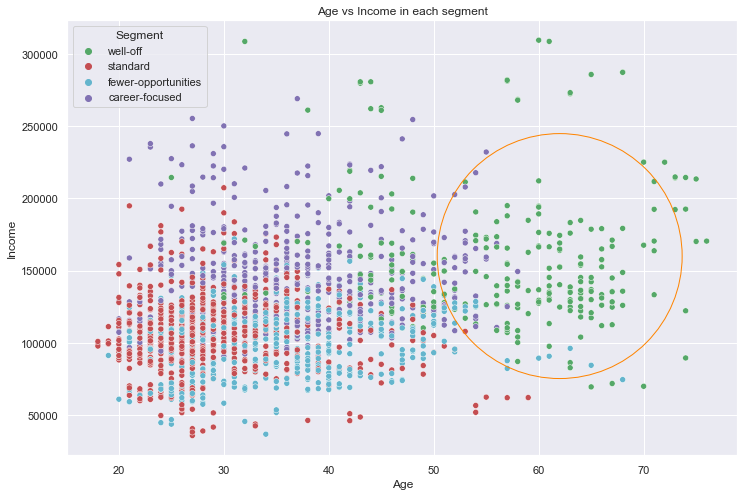

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_customers_kmeans['Age'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(62, 160000 , s=60000, facecolors='none', edgecolors='#FF8400' ) 
plt.title('Age vs Income in each segment')
plt.show()

#### (Education vs Income)

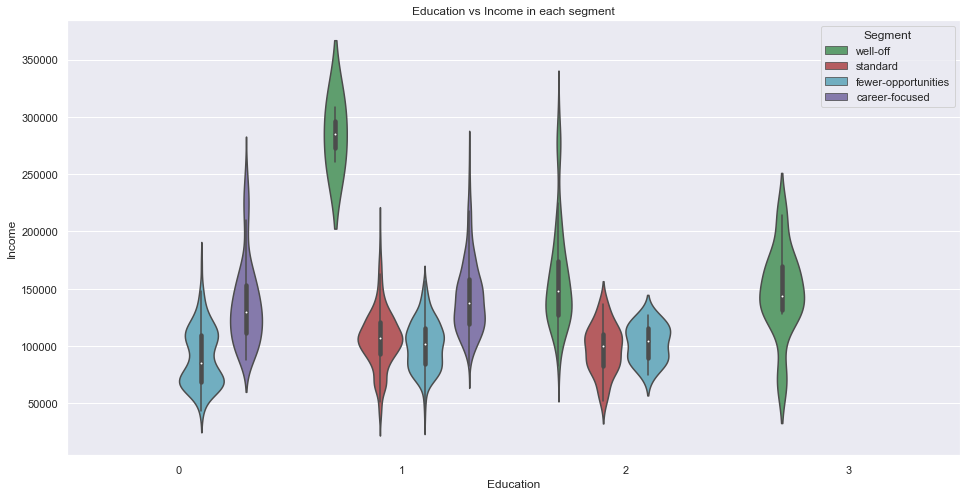

In [56]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    x=df_customers_kmeans['Education'],
    y=df_customers_kmeans['Income'],
    hue=df_customers_kmeans['Segment'],
    palette=['g','r','c','m']
)
plt.title('Education vs Income in each segment')
plt.show()

---

### Improve k-means with PCA

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(customers_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Let’s plot the cumulative sum of the variability against the number of components.

Text(0, 0.5, 'Cumulative Explained Variance')

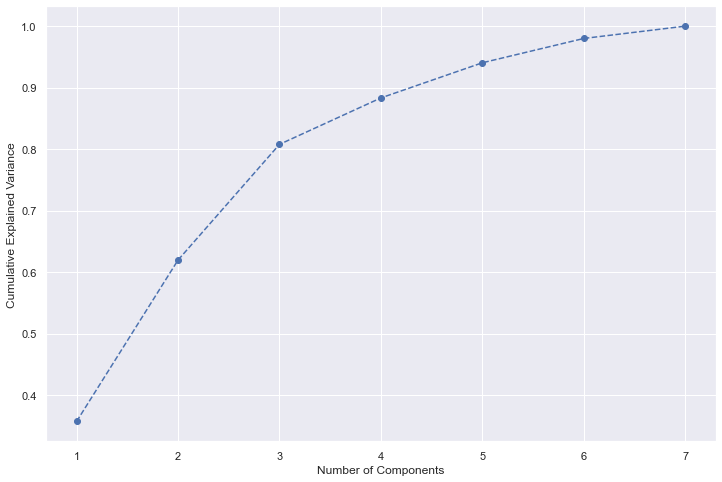

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Let’s pick 3 components and fit our pca model.

In [59]:
pca = PCA(n_components=3)
pca.fit(customers_std)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df_customers.columns.values,
    index=['component 1', 'component 2', 'component 3'])

df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.3147,-0.1917,0.3261,0.1568,0.5245,0.4921,0.4648
component 2,0.4580,0.5126,0.3122,0.6398,0.1247,0.0147,-0.0696
component 3,-0.2930,-0.4420,0.6095,0.2756,-0.1657,-0.3955,-0.2957


New correlation matrix for the three selected components

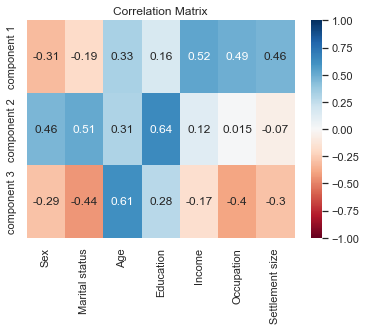

In [60]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

### Implementing K-Means Clustering

Let's implement k-means clustering considering our three components as features.

In [61]:
pca_scores = pca.transform(customers_std)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_

C:\Users\young\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


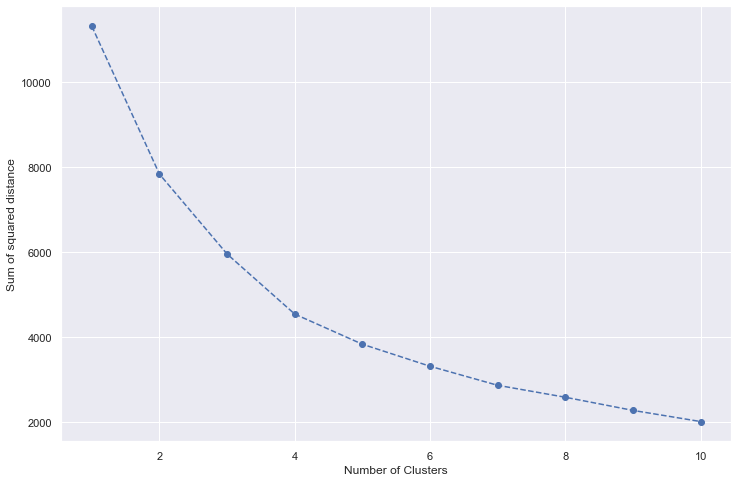

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### Implementing K-Means Clustering with 4 clusters

In [63]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [64]:
df_segm_pca = pd.concat([df_customers.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


### Analyze segmentation results

In [65]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3
K-means PCA,,,,,,,,,,
0,0.9003,0.9653,28.8786,1.0607,107551.5000,0.6777,0.4408,-1.1070,0.7038,-0.7814
1,0.0274,0.1681,35.7376,0.7341,141525.8268,1.2676,1.4803,1.3727,-1.0462,-0.2480
2,0.3065,0.0957,35.3130,0.7609,93692.5674,0.2522,0.0391,-1.0464,-0.9030,1.0036
3,0.5057,0.6906,55.6792,2.1283,158019.1019,1.1208,1.1019,1.6873,2.0312,0.8440


- **Segment 0**: low career and experience values with high education and lifestyle values. 
  Label: Standard
- **Segment 1**: high career but low education, lifestyle and experience
  Label: Career focused
- **Segment 2**: low career, education and lifestyle, but high life experience
  Label: Fewer opportunities
- **Segment 3**: high career, education and lifestyle as well as high life experience
  Label: Well-off


In [66]:
df_segm_pca_analysis['Count'] = df_segm_pca[['K-means PCA', 'Sex']].groupby(['K-means PCA']).count()
df_segm_pca_analysis['%'] = df_segm_pca_analysis['Count'] / df_segm_pca_analysis['Count'].sum()
df_segm_pca_analysis.rename(index={
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
}, inplace=True)

df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,Count,%
K-means PCA,,,,,,,,,,,,
standard,0.9003,0.9653,28.8786,1.0607,107551.5000,0.6777,0.4408,-1.1070,0.7038,-0.7814,692,0.3460
career-focused,0.0274,0.1681,35.7376,0.7341,141525.8268,1.2676,1.4803,1.3727,-1.0462,-0.2480,583,0.2915
fewer-opportunities,0.3065,0.0957,35.3130,0.7609,93692.5674,0.2522,0.0391,-1.0464,-0.9030,1.0036,460,0.2300
well-off,0.5057,0.6906,55.6792,2.1283,158019.1019,1.1208,1.1019,1.6873,2.0312,0.8440,265,0.1325


Let’s take a look at the number of customers per segment:

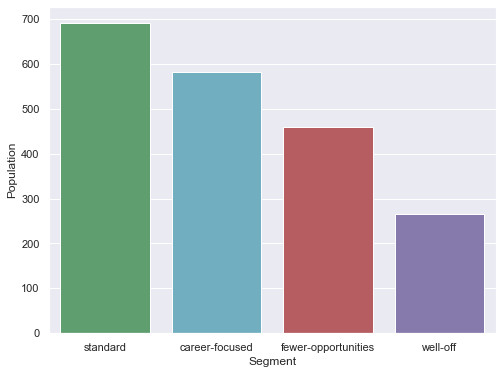

In [67]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

Add the segment labels to the original dataset

In [68]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'standard',
    1: 'career-focused',
    2: 'fewer-opportunities',
    3: 'well-off'
})
df_segm_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 1,component 2,component 3,K-means PCA,Segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer-opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer-opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer-opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


Let's visualize the segments with respect to the first two components.

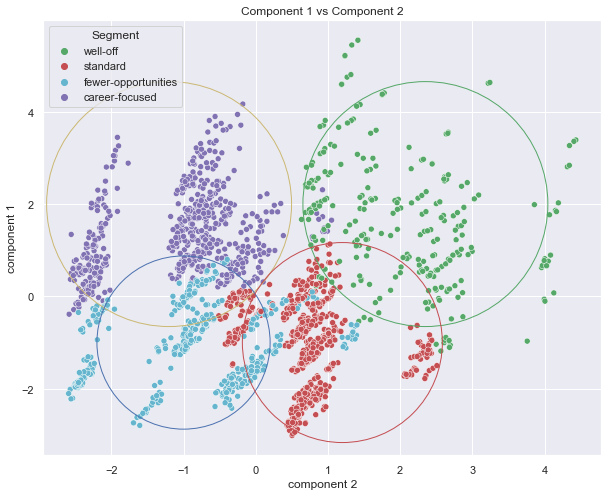

In [69]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()

### Observation 

Performed dimension reduction using PCA and selected the dimensions based on variance explained

Applied K-Means clustering algorithm and estimated optimum number of clusters as k = 4 using the Elbow method